In [1]:
import pandas as pd
import json
with open("002_fasttext_results.json") as f:
    content = json.load(f)
new_content = list()

for setup in content:
    for run in content.get(setup).get("runs"):
        new_dict = dict()
        new_dict["setup"] = setup
        new_dict["test"] = content[setup]["test"]
        new_dict["train"] = content[setup]["train"]
        new_dict = {**new_dict, **run}
        new_content.append(new_dict)
df = pd.DataFrame(data=new_content)

In [2]:
import numpy as np
df.groupby(["train", "test"]).agg({
    "accuracy": lambda l: f"{np.mean(l):0.3}±{np.std(l):0>0.3}, max: {np.max(l):0.3}",
    "macroF1": lambda l: f"{np.mean(l):0.3}±{np.std(l):0>0.3}, max: {np.max(l):0.3}",
    "y_true": "count"
}
)

accuracy  \
train                               test                                                            
data/interim/SETimes_train.fasttext data/interim/SETimes_test.fasttext   0.99±0.000532, max: 0.99   
                                    data/interim/Twitter_test.fasttext  0.787±0.00357, max: 0.795   
data/interim/Twitter_train.fasttext data/interim/SETimes_test.fasttext      0.321±0.0, max: 0.321   
                                    data/interim/Twitter_test.fasttext      0.705±0.0, max: 0.705   

                                                                                          macroF1  \
train                               test                                                            
data/interim/SETimes_train.fasttext data/interim/SETimes_test.fasttext   0.99±0.000524, max: 0.99   
                                    data/interim/Twitter_test.fasttext  0.522±0.00607, max: 0.534   
data/interim/Twitter_train.fasttext data/interim/SETimes_test.fasttext      0.162±0.0, max: 0.162   
                                    data/interim/Twitter_test.fasttext      0.276±0.0, max: 0.276   

                                                                        y_true  
train                               test                                        
data/interim/SETimes_train.fasttext data/interim/SETimes_test.fasttext       5  
                                    data/interim/Twitter_test.fasttext       5  
data/interim/Twitter_train.fasttext data/interim/SETimes_test.fasttext       5  
                                    data/interim/Twitter_test.fasttext       5

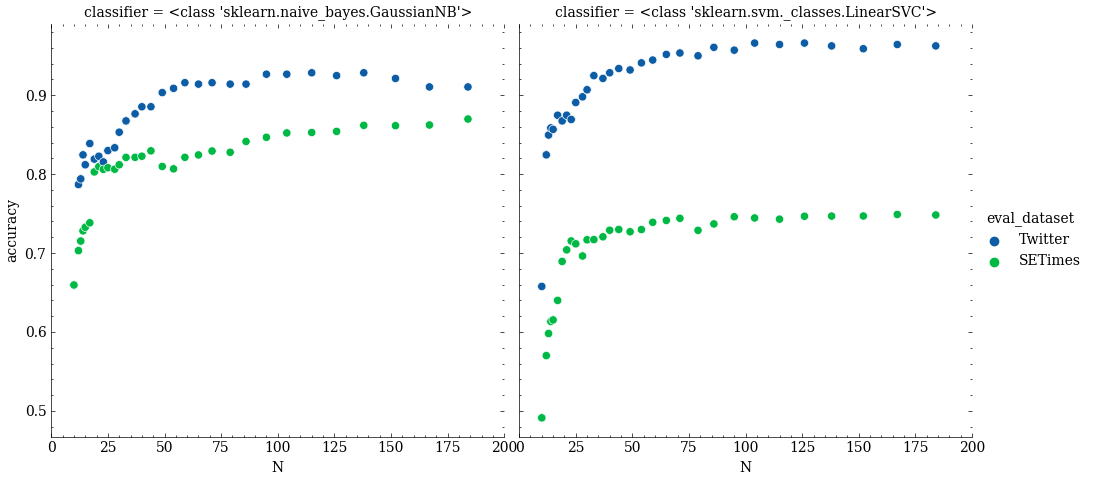

In [33]:
with open("003_results.json") as f:
    content = json.load(f)
df = pd.DataFrame(content)

# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['science', 'no-latex'])

# Create a visualization
g = sns.relplot(
    data=df,
    x="N", #y="macroF1",
    y="accuracy",
    hue="eval_dataset", col="classifier",
    
)

g.set(xlim=(0, 200))
# plt.savefig("images/003_N_sweep_accuracy_zoom.png")

In [14]:
df.shape

(200, 7)

In [24]:
df.groupby(["N", "classifier", "eval_dataset"]).count()

microF1  macroF1  \
N    classifier                               eval_dataset                     
10   <class 'sklearn.naive_bayes.GaussianNB'> SETimes             4        4   
                                              Twitter             4        4   
     <class 'sklearn.svm._classes.LinearSVC'> SETimes             4        4   
                                              Twitter             4        4   
12   <class 'sklearn.naive_bayes.GaussianNB'> SETimes             2        2   
...                                                             ...      ...   
910  <class 'sklearn.svm._classes.LinearSVC'> Twitter             1        1   
1000 <class 'sklearn.naive_bayes.GaussianNB'> SETimes             1        1   
                                              Twitter             1        1   
     <class 'sklearn.svm._classes.LinearSVC'> SETimes             1        1   
                                              Twitter             1        1   

                                                            accuracy  cm  \
N    classifier                               eval_dataset                 
10   <class 'sklearn.naive_bayes.GaussianNB'> SETimes              4   4   
                                              Twitter              4   4   
     <class 'sklearn.svm._classes.LinearSVC'> SETimes              4   4   
                                              Twitter              4   4   
12   <class 'sklearn.naive_bayes.GaussianNB'> SETimes              2   2   
...                                                              ...  ..   
910  <class 'sklearn.svm._classes.LinearSVC'> Twitter              1   1   
1000 <class 'sklearn.naive_bayes.GaussianNB'> SETimes              1   1   
                                              Twitter              1   1   
     <class 'sklearn.svm._classes.LinearSVC'> SETimes              1   1   
                                              Twitter              1   1   

                                                            y_true  y_pred  
N    classifier                               eval_dataset                  
10   <class 'sklearn.naive_bayes.GaussianNB'> SETimes            4       4  
                                              Twitter            4       4  
     <class 'sklearn.svm._classes.LinearSVC'> SETimes            4       4  
                                              Twitter            4       4  
12   <class 'sklearn.naive_bayes.GaussianNB'> SETimes            2       2  
...                                                            ...     ...  
910  <class 'sklearn.svm._classes.LinearSVC'> Twitter            1       1  
1000 <class 'sklearn.naive_bayes.GaussianNB'> SETimes            1       1  
                                              Twitter            1       1  
     <class 'sklearn.svm._classes.LinearSVC'> SETimes            1       1  
                                              Twitter            1       1  

[196 rows x 6 columns]